In [101]:
#importing necesarry packages
from skimage.metrics import structural_similarity #helps in finding structural similarities between objects
import imutils #grabbing contours
import cv2 #image processing
from PIL import Image #downloading and visualizing image
import requests #fetching data from urls

In [102]:
!mkdir pan_card_tampering
!mkdir pan_card_tampering/image

mkdir: cannot create directory ‘pan_card_tampering’: File exists
mkdir: cannot create directory ‘pan_card_tampering/image’: File exists


In [103]:
#open image and display
original = Image.open(requests.get('https://www.tysol.pl/imgcache/750x530/c//zdj/zdjecie/21529.jpg', stream=True).raw)
tampered = Image.open(requests.get('https://cdn.hejto.pl/uploads/posts/images/500x500/20cac5445eb68da586dfb79a5758b03c.jpg', stream=True).raw)

In [104]:
#file format of the source files
print("Original image format: ",original.format)
print('Tampered image format: ',tampered.format)

#image size(px), w x h
print('Original image size: ', original.size)
print('Tampered image size: ', tampered.size)

Original image format:  PNG
Tampered image format:  JPEG
Original image size:  (750, 530)
Tampered image size:  (500, 325)


In [105]:
#adjusting sizes of images
original = original.resize((250, 160))
print(original.size)
original.save('pan_card_tampering/image/original.png')
tampered = tampered.resize ((250,160))
print(tampered.size)
tampered.save('pan_card_tampering/image/tampered.png')

(250, 160)
(250, 160)


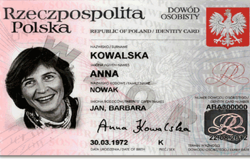

In [106]:
#original document
original

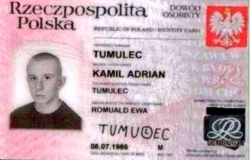

In [107]:
#tampered document
tampered


In [108]:
#loading images to cv2
original = cv2.imread('pan_card_tampering/image/original.png')
tampered = cv2.imread('pan_card_tampering/image/tampered.png')

array([[204, 212, 216, ..., 169, 156, 204],
       [207, 211, 216, ..., 187, 169, 205],
       [208, 208, 211, ..., 193, 173, 206],
       ...,
       [214, 224, 222, ..., 194, 175, 203],
       [196, 213, 217, ..., 197, 174, 205],
       [106, 140, 144, ..., 196, 173, 207]], dtype=uint8)
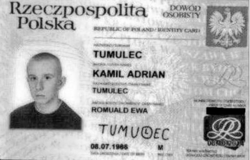

In [109]:
#changing colour to grayscale
original_g = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_g = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)
tampered_g

array([[217, 220, 219, ..., 197, 196, 199],
       [221, 226, 229, ..., 196, 195, 197],
       [222, 227, 226, ..., 197, 195, 195],
       ...,
       [209, 204, 203, ..., 201, 201, 201],
       [243, 239, 236, ..., 236, 236, 236],
       [254, 254, 254, ..., 254, 254, 254]], dtype=uint8)
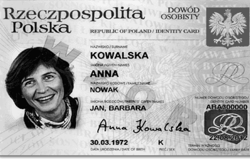

In [110]:
original_g

In [111]:
#computing SSIM between documents with difference image
(score, diff) = structural_similarity(original_g, tampered_g, full = True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))
if score < 0.9:
    print("possibly tampered")
else:
    print("original")

SSIM: 0.24442812054590884
possibly tampered


In [112]:
#threshold and contours
thersh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1] #getting threshold
cnts = cv2.findContours(thersh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts) #getting contours

In [113]:
for c in cnts:
  #applying contours on the image
  (x, y, w, h) = cv2.boundingRect(c)
  cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 2)
  cv2.rectangle(tampered, (x, y), (x + w, y + h), (0, 0, 255), 2)

Original Image


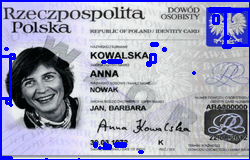

In [114]:
#display original document with contour
print("Original Image")
Image.fromarray(original)

Tampered Image


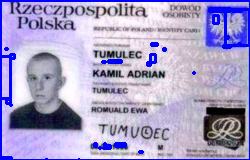

In [115]:
#display tampered document with contour
print("Tampered Image")
Image.fromarray(tampered)

Difference image


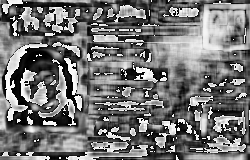

In [116]:
#display difference image
print("Difference image")
Image.fromarray(diff)

Threshold Image


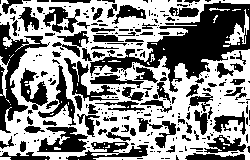

In [117]:
#display threshold image with white
print('Threshold Image')
Image.fromarray(thersh)